# Análise Y.Afisha

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Tratamento de dados 

In [2]:
#lendo dados de forma limitada inicialmente para economizar memória
visits_sample = pd.read_csv("/datasets/visits_log_us.csv", nrows=500)
visits_sample.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


In [3]:
#convertendo dados para o tipo correto

print(visits_sample["Device"].unique())

visits = pd.read_csv("/datasets/visits_log_us.csv", dtype={"Device": "category"}, parse_dates=["Start Ts", "End Ts"])

['touch' 'desktop']


In [4]:
#colocando tudo em snake_case

visits.columns = visits.columns.str.strip().str.lower().str.replace(" ", "_")
print(visits.columns)
print(visits.info())

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None


In [5]:
#lendo o próximo dataframe

orders_sample = pd.read_csv("/datasets/orders_log_us.csv", nrows=500)
print(orders_sample.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB
None


In [6]:
#lendo o dataframe com os tipos de dados certos

orders = pd.read_csv("/datasets/orders_log_us.csv", parse_dates=["Buy Ts"])
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [7]:
orders.columns = orders.columns.str.strip().str.lower().str.replace(" ", "_")
print(orders.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [8]:
#lendo o último dataframe

costs_sample = pd.read_csv("/datasets/costs_us.csv", nrows=500)
print(costs_sample.info(memory_usage="deep"))
print()
print(costs_sample.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB
None

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [9]:
costs = pd.read_csv("/datasets/costs_us.csv", parse_dates=["dt"])
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


In [10]:
print(visits.head())
print()
print(orders.head())
print()
print(costs.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

               buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3        

## Relatório de produto

### Quantas pessoas usam o app por dia, semana e mês?

In [11]:
visits["date"] = visits["start_ts"].dt.date

daily_users = visits.groupby("date")["uid"].nunique().reset_index(name= "n_users")
print("O número de usuários por dia é")
print(daily_users)

O número de usuários por dia é
           date  n_users
0    2017-06-01      605
1    2017-06-02      608
2    2017-06-03      445
3    2017-06-04      476
4    2017-06-05      820
..          ...      ...
359  2018-05-27      620
360  2018-05-28     1039
361  2018-05-29      948
362  2018-05-30     1289
363  2018-05-31     1997

[364 rows x 2 columns]


In [12]:
visits["week"] = visits["start_ts"].dt.to_period("W")
weekly_users = visits.groupby("week")["uid"].nunique().reset_index(name="n_users")
print("O número de ususários por semana é:")
print(weekly_users)

O número de ususários por semana é:
                     week  n_users
0   2017-05-29/2017-06-04     2021
1   2017-06-05/2017-06-11     4129
2   2017-06-12/2017-06-18     2812
3   2017-06-19/2017-06-25     2878
4   2017-06-26/2017-07-02     3064
5   2017-07-03/2017-07-09     3294
6   2017-07-10/2017-07-16     4355
7   2017-07-17/2017-07-23     3841
8   2017-07-24/2017-07-30     2655
9   2017-07-31/2017-08-06     2364
10  2017-08-07/2017-08-13     2444
11  2017-08-14/2017-08-20     2746
12  2017-08-21/2017-08-27     3116
13  2017-08-28/2017-09-03     3694
14  2017-09-04/2017-09-10     4412
15  2017-09-11/2017-09-17     4319
16  2017-09-18/2017-09-24     4874
17  2017-09-25/2017-10-01     6241
18  2017-10-02/2017-10-08     7612
19  2017-10-09/2017-10-15     7074
20  2017-10-16/2017-10-22     7148
21  2017-10-23/2017-10-29     7401
22  2017-10-30/2017-11-05     7480
23  2017-11-06/2017-11-12     7179
24  2017-11-13/2017-11-19     8117
25  2017-11-20/2017-11-26    10586
26  2017-11-27/2017

In [13]:
visits["month"] = visits["start_ts"].dt.to_period("M")

monthly_users = visits.groupby("month")["uid"].nunique().reset_index(name="n_users")
print("O número de usuários por mês é:")
print(monthly_users)

O número de usuários por mês é:
      month  n_users
0   2017-06    13259
1   2017-07    14183
2   2017-08    11631
3   2017-09    18975
4   2017-10    29692
5   2017-11    32797
6   2017-12    31557
7   2018-01    28716
8   2018-02    28749
9   2018-03    27473
10  2018-04    21008
11  2018-05    20701


In [14]:
print("Mediana de usuários por dia:")
print(daily_users["n_users"].median())
print()
print("Mediana de usuários por semana")
print(weekly_users["n_users"].median())
print()
print("Mediana de usuários por mês")
print(monthly_users["n_users"].median())

Mediana de usuários por dia:
921.0

Mediana de usuários por semana
5740.0

Mediana de usuários por mês
24240.5


### Quantas sessões ocorrem por dia?

In [15]:
sessions_per_date = visits.groupby("date").size().reset_index(name= "n_sessions")
sessions_per_date = sessions_per_date.sort_values("date")
print(sessions_per_date)

           date  n_sessions
0    2017-06-01         664
1    2017-06-02         658
2    2017-06-03         477
3    2017-06-04         510
4    2017-06-05         893
..          ...         ...
359  2018-05-27         672
360  2018-05-28        1156
361  2018-05-29        1035
362  2018-05-30        1410
363  2018-05-31        2256

[364 rows x 2 columns]


In [16]:
print("A mediana de sessões por dia é:")
print(sessions_per_date["n_sessions"].median())

A mediana de sessões por dia é:
1003.0


### Que comprimento tem cada sessão?

In [17]:
visits["session_length"] = visits["end_ts"] - visits["start_ts"]
visits["session_length"] = visits["session_length"].dt.total_seconds()
print(visits["session_length"])

0         1080.0
1         1680.0
2            0.0
3         1440.0
4            0.0
           ...  
359395      19.0
359396      19.0
359397      19.0
359398      19.0
359399      19.0
Name: session_length, Length: 359400, dtype: float64


In [18]:
print("A mediana de duração de sessões é:")
print(visits["session_length"].median())

A mediana de duração de sessões é:
300.0


### Com que frequência os usuários voltam?

In [19]:
f_visit = visits.groupby("uid")["month"].min().reset_index().rename(columns={"month": "first_month"})

visits = visits.merge(f_visit, on="uid")

In [20]:
visits["lifetime"] = (visits["month"] - visits["first_month"]).apply(lambda x: x.n)

In [21]:
cohort = (visits.groupby(["first_month", "lifetime"]).agg({"uid": "nunique"}).reset_index())

#definindo coorte inicial

initial_users = (cohort[cohort["lifetime"] == 0][["first_month", "uid"]].rename(columns={"uid": "users"}))

#calculando taxa de retenção

cohort = cohort.merge(initial_users, on="first_month")
cohort["retention"] = cohort["uid"] / cohort["users"]

In [22]:
retention_pivot = cohort.pivot_table(index="first_month", columns="lifetime", values="retention", aggfunc="sum")
print(retention_pivot)

lifetime      0         1         2         3         4         5         6   \
first_month                                                                    
2017-06      1.0  0.078664  0.053775  0.061392  0.068557  0.071423  0.061015   
2017-07      1.0  0.056088  0.051294  0.056164  0.058219  0.048174  0.045358   
2017-08      1.0  0.076908  0.062862  0.062764  0.050093  0.044004  0.036342   
2017-09      1.0  0.085489  0.069205  0.050706  0.039392  0.037835  0.035860   
2017-10      1.0  0.078608  0.052239  0.038958  0.034261  0.032221  0.021365   
2017-11      1.0  0.078281  0.044113  0.038682  0.033727  0.023415  0.021800   
2017-12      1.0  0.055802  0.037993  0.031107  0.020263  0.019036       NaN   
2018-01      1.0  0.059715  0.039339  0.024973  0.020244       NaN       NaN   
2018-02      1.0  0.057080  0.025454  0.020093       NaN       NaN       NaN   
2018-03      1.0  0.041818  0.027053       NaN       NaN       NaN       NaN   
2018-04      1.0  0.048380       NaN    

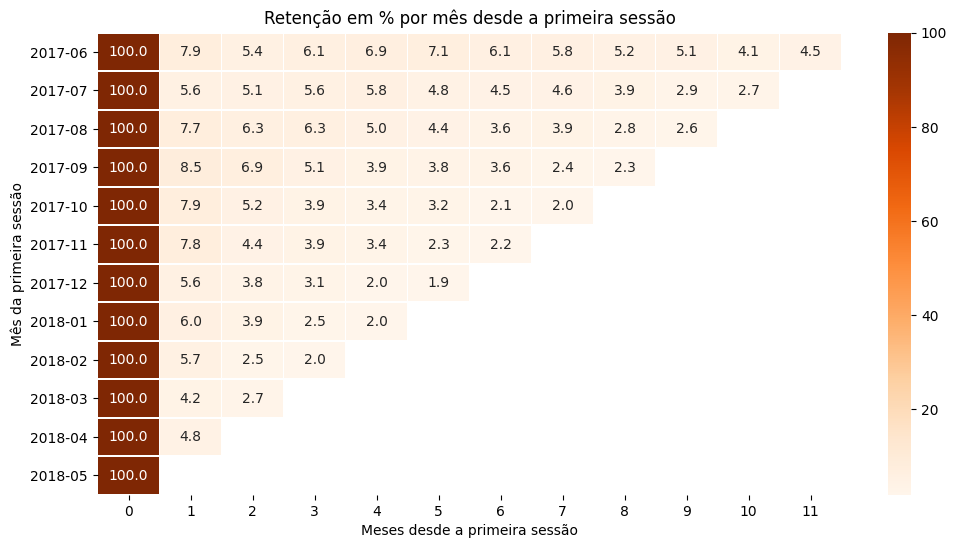

In [32]:

retention_heatmap = retention_pivot * 100

plt.figure(figsize=(12, 6))
sns.heatmap(retention_heatmap, annot=True, fmt=".1f", cmap="Oranges", linewidths= 0.5)

plt.title("Retenção em % por mês desde a primeira sessão")
plt.xlabel("Meses desde a primeira sessão")
plt.ylabel("Mês da primeira sessão")
plt.show()

## Vendas

In [ ]:
#para o caso de algum usuário ter comprado vindo de canais diferentes, vamos usar .first() para considerar apenas a primeira fonte
source = visits.sort_values("start_ts").groupby("uid")["source_id"].first().reset_index(name="first_source")

In [ ]:
#calculando primeira visita e primeira compra
first_visit = (visits.groupby("uid")["start_ts"].min().reset_index(name="first_visit"))
first_purchase = orders.groupby("uid")["buy_ts"].min().reset_index(name="first_purchase")

In [ ]:
conversion = (first_visit.merge(first_purchase, on="uid", how="inner").merge(source, on="uid", how="left"))

In [ ]:
conversion["days_to_conversion"] = ((conversion["first_purchase"] - conversion["first_visit"]).dt.days)

In [ ]:
bins = [-1, 0, 1, 3, 7, 14, 30, 60, np.inf] #usando np.inf para definir um número máximo
labels = ["0d", "1d", "2-3d", "4-7d", "8-14d", "15-30d", "31-60d", ">60d"]


conversion["days_bucket"] = pd.cut(conversion["days_to_conversion"], bins=bins, labels=labels) #fazendo cortes de tempo (ou "buckets") para realizar análise

conversion_by_bucket = (conversion["days_bucket"].value_counts().sort_index().reset_index(name="usuários").rename(columns={"index": "dias"}))

print("Dias até a primeira compra:")
print(conversion_by_bucket)

In [ ]:

conversion_by_channel_bucket = (conversion.groupby(["first_source", "days_bucket"])["uid"].nunique().reset_index(name="n_users").sort_values(["first_source", "days_bucket"]))

print("Distribuição por canal e bucket de dias até conversão:")
print(conversion_by_channel_bucket)



In [ ]:
pivot_table = conversion_by_channel_bucket.pivot(index="first_source", columns= "days_bucket", values="n_users")

pivot_table.plot(kind="bar", stacked=True)
plt.title("Distribuição por canal e dias até conversão")
plt.xlabel("Canal")
plt.ylabel("Número de Usuários")
plt.legend(title="Dias")
plt.show()


### Quantos pedidos os clientes fazem durante um determinado período de tempo?

In [ ]:
start_date = "2017-06-01"
end_date = "2017-08-31"

In [ ]:
orders_period = orders[(orders["buy_ts"] >= start_date) & (orders["buy_ts"] <= end_date)]

In [ ]:
total_orders = len(orders_period)
total_customers = orders_period["uid"].nunique()
avg_orders_customer = total_orders / total_customers

print("Total de pedidos nos 3 primeiros meses:")
print(total_orders)
print()
print("Total de clientes:")
print(total_customers)
print()
print("Média de pedidos nos 3 primeiros meses:")
print(avg_orders_customer)

### Qual é o volume médio de uma compra?

In [ ]:
avg_order_value = orders["revenue"].mean()

print("O volume médio de uma compra é:")
print(avg_order_value)

### Quanto dinheiro eles trazem para a empresa (LTV)?

In [40]:
orders["order_month"] = orders["buy_ts"].dt.to_period("M") #criando coluna de mês de compra

In [41]:
first_order_month = orders.groupby("uid")["order_month"].min().reset_index().rename(columns={"order_month": "first_order_month"})

cohorts = orders.merge(first_order_month, on="uid")

In [48]:
cohorts["month_diff"] = (cohorts["order_month"].astype("int64") - cohorts["first_order_month"].astype("int64"))
cohort_sizes = (cohorts.groupby("first_order_month")["uid"].nunique().reset_index().rename(columns={"uid": "n_buyers"}))
cohorts = cohorts.merge(cohort_sizes, on="first_order_month")
cohorts["ltv"] = cohorts["revenue"] / cohorts["n_buyers"]

In [49]:
ltv_pivot = cohorts.pivot_table(index="first_order_month", columns="month_diff", values="ltv", aggfunc="sum")
ltv_cumsum = ltv_pivot.cumsum(axis=1).round(2)

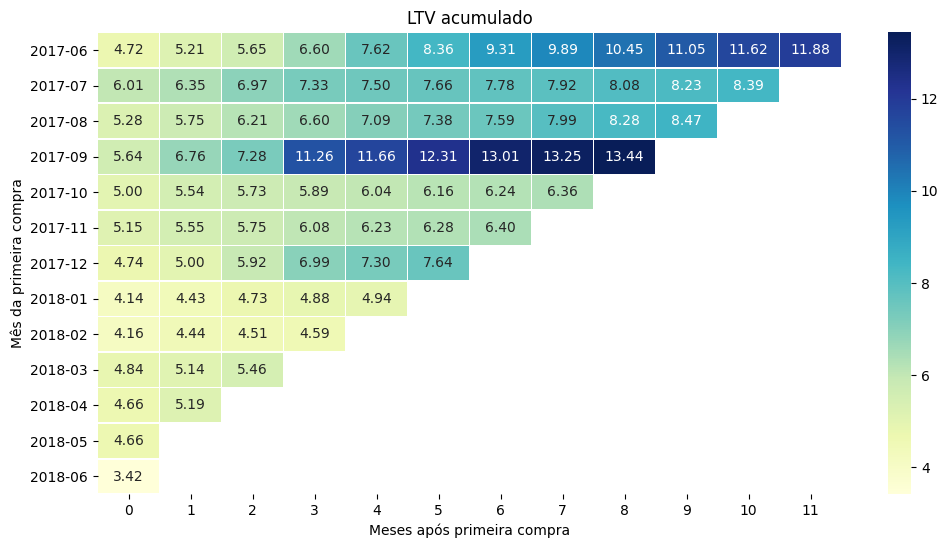

In [50]:
plt.figure(figsize=(12, 6))

sns.heatmap(ltv_cumsum, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("LTV acumulado")
plt.xlabel("Meses após primeira compra")
plt.ylabel("Mês da primeira compra")
plt.show()

## Marketing

### Quanto dinheiro foi gasto no total?

In [ ]:
total_spent = costs["costs"].sum()

print("Total de dinheiro gasto:")
print(total_spent)

In [ ]:
#criando gráfico de custo por origem

costs_by_source = costs.groupby("source_id")["costs"].sum().reset_index()

costs_by_source["source_id"] = costs_by_source["source_id"].astype(str) #convertendo para string para que todas os canais apareçam separados.

plt.bar(costs_by_source["source_id"], costs_by_source["costs"])
plt.xlabel("Origem")
plt.ylabel("Custo Total")
plt.title("Com quais canais gastamos mais")
plt.show()

### Quanto dinheiro foi gasto por origem?

In [ ]:
spent_by_source = costs.groupby("source_id")["costs"].sum().reset_index()

print("Total de dinheiro gasto por origem:")

print(spent_by_source)

### Quanto dinheiro foi gasto por mês?

In [ ]:
costs["month"] = costs["dt"].dt.to_period("M")

spent_by_month = costs.groupby("month")["costs"].sum().reset_index().sort_values("month")

print("Dinheiro gasto ao longo dos meses")
print(spent_by_month)

### Quanto custou a aquisição de clientes para cada origem?

In [ ]:
#juntando e agrupando dataframes necessários
orders_with_source = orders.merge(visits[["uid", "source_id"]], on="uid", how="left")
customers_by_source = orders_with_source.groupby("source_id")["uid"].nunique().reset_index(name="n_customers")

In [ ]:
#agrupando custos por origem
costs_by_source = costs.groupby("source_id")["costs"].sum().reset_index(name="total_cost")

In [ ]:
cac = costs_by_source.merge(customers_by_source, on="source_id", how="left")

In [ ]:
cac["CAC"] = cac["total_cost"] / cac["n_customers"]

print(cac)

In [ ]:
#criando um gráfico que mostra CAC por origem

cac_sorted = cac.sort_values("CAC")

plt.bar(cac_sorted["source_id"], cac_sorted["CAC"])
plt.xlabel("Origem")
plt.ylabel("CAC")
plt.title("Qual foi o CAC para cada origem?")
plt.xticks(cac_sorted["source_id"])
plt.tight_layout()
plt.show()

### Os investimentos valeram a pena?

In [ ]:
revenue_by_source = orders_with_source.groupby("source_id")["revenue"].sum().reset_index(name="total_revenue")

In [ ]:
roi = revenue_by_source.merge(costs_by_source, on="source_id", how="left")

In [ ]:
roi["ROI"] = (roi["total_revenue"] - roi["total_cost"]) / roi["total_cost"]

In [ ]:
print(roi)

In [ ]:
#Criando um gráfico que mostra ROI por origem

roi_sorted = roi.sort_values("source_id")

roi_sorted["source_id"] = roi_sorted["source_id"].astype(str)

plt.bar(roi_sorted["source_id"], roi_sorted["ROI"])

plt.bar(roi_sorted["source_id"], roi_sorted["ROI"])
plt.xlabel("Origem")
plt.ylabel("ROI")
plt.title("ROI por origem")

## Dispositivos

### Receita total por dispositivo

In [ ]:
last_visit_per_user = visits.sort_values("start_ts").drop_duplicates(subset="uid", keep="last")
orders_full = orders.merge(last_visit_per_user[["uid", "device", "source_id"]], on="uid", how="left")
orders_full["month"] = orders_full["buy_ts"].dt.to_period("M")

In [ ]:
revenue_by_device = orders_full.groupby("device")["revenue"].sum().reset_index()

In [ ]:
plt.bar(revenue_by_device["device"], revenue_by_device["revenue"])
plt.xlabel("Dispositivo")
plt.ylabel("Receita total")
plt.title("Receita total por dispositivo")
plt.show()

### Conversão por dispositivo

In [ ]:

visits_by_device = (visits.groupby("device")["uid"].nunique().reset_index(name="unique_visitors"))

customers_by_device = orders_full.groupby("device")["uid"].nunique().reset_index(name="customers")

conversion_device = visits_by_device.merge(customers_by_device, on="device", how="left")
conversion_device["conversion_rate"] = conversion_device["customers"] / conversion_device["unique_visitors"]

plt.bar(conversion_device["device"], conversion_device["conversion_rate"])
plt.xlabel("Dispositivo")
plt.ylabel("Taxa de conversão")
plt.title("Taxa de conversão por dispositivo")
plt.show()

### Receita por origem e dispositivo

In [ ]:
revenue_source_device = (orders_full.groupby(["source_id", "device"])["revenue"].sum().reset_index())

revenue_source_device = (orders_full.groupby(["source_id", "device"])["revenue"].sum().unstack("device", fill_value=0) .sort_index())

print(revenue_source_device.head())


In [ ]:
revenue_source_device.plot(kind="bar", figsize=(10,5))
plt.xlabel("Origem (source_id)")
plt.ylabel("Receita")
plt.title("Receita por origem e dispositivo")
plt.xticks(rotation=0)   
plt.legend(title="Dispositivo")
plt.tight_layout()
plt.show()

## Conclusão

Após analisar diferentes dados do Y.Afisha, chego às seguintes conclusões:

O faturamento do desktop é consideravelmente maior do que nos dispositivos touch. Olhando apenas para isto, poderíamos chegar à conclusão de que a primeira escolha seria aumentar o investimento neste dispositivo.

No entanto, considerando o uso cada vez maior de dispositivos touch (como smartphones) para compras, acredito que valeria a pena investir melhor na otimização da conversão em dispositivos touch, já que a taxa de conversão para estes aparelhos é consideravelmente menor do que para desktop. Isto pode ser causado por uma possível má experiência do usuário na versão touch da plataforma, o que vale a pena ser investigado.

Ademais, pode haver mais espaço para crescer com vendas nesta modalidade, investindo principalmente em anúncios na origem "1", que é o único que traz ROI acima de 100%. Este potencial não vem sido bem aproveitado, visto que é um dos canais com menor fluxo de investimento, enquanto a origem "3", campeã em investimento, tem um ROI extremamente baixo.

Outra consideração importante, é que, atualmente há uma grande concentração do total do LTV no mês 0. Isto significa que os clientes não tendem a fazer muitas compras no longo prazo, logo a retenção é baixa. Vale a pena investigar as causas disto, que podem ser variadas, como alguma falha no produto ou pouco investimento no pós-vendas.

